<a href="https://colab.research.google.com/github/krishnayele/GoogleColab/blob/master/Oracle%2BData_science%2BClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Example
This example is direct replica of implementation in [Oracle+DataScience](https://www.datascience.com/blog/supervised-learning-python)

The extra superficial theory on Supervised learning is given [this blog post](https://towardsdatascience.com/supervised-machine-learning-classification-5e685fe18a6d) . Of which exerpts will be pasted here for better understanding.

The detailed version of explaination is provided on that website. Please visit that website. 

For the classification example we are using UCI ML Breast cancer Winsconsin dataset
Here, rather than predicting a qauntitative output, we are predicting qualitative one.

If we desginate each one of these abels as a class, with values of **0 for malignant and 1 for benign**. what we'd really like is for our model to return a probabilty of each mass belonging to the benign class.
A function that always returns the value between 0 and 1 can achieved using **logistic function**




`f(x) = 1/(1+exp(-x))`

graph is plotted below


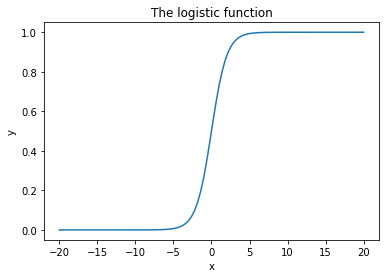

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-20,20,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The logistic function')
plt.show()

### Another way to measure accuracy requires a more specific definition of correct and incorrect predictions. Consider the following terms:

  *  A true positive classification is one where we correctly predicted that a sample belonged to the positive class (in this case, we'll call the malignant class positive).
  * A true negative classification is one where we correctly predicted that a sample belonged to the negative class (in this case, we'll call the benign class negative).
  * A false positive classification is one where we incorrectly predicted that a sample belonged to the positive class (in this case, we said the mass was malignant when it was actually benign).
  * A false negative classification is one where we incorrectly predicted that a sample belonged to the negative class (in this case, we said the mass was benign when it was actually malignant).
  
Depending on the problem, you may be more concerned with tracking the number of false positives or false negatives, rather than the overall accuracy. The accuracy metric assumes that true positive and true negative classifications are equally important. In many cases, including fraud detection and cancer diagnoses, false negatives are much more dangerous than false positives.

With these new terms defined, we can compute what is known as the confusion matrix for our classifier. For a binary classifier such as the one we're going to create, the confusion matrix lists the total count of each of the four types of classifications after a set of predictions has been made. From there, a variety of metrics can be calculated depending on the problem.

Note: Copy of [original](https://towardsdatascience.com/supervised-machine-learning-classification-5e685fe18a6d) content 
# 1. Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It is a table with 4 different combinations of predicted and actual values in the case for a binary classifier.
![Confusion matrix img](https://cdn-images-1.medium.com/max/800/1*ztwlM6IOCcwer5ih9Hdi2Q.png)

The confusion matrix for a multi-class classification problem can help you determine mistake patterns.

for a binary classifier,
![Binary confusion Matrix](https://cdn-images-1.medium.com/max/800/1*mrBc8OW0NfXv43fpSnMa9g.png)

1. false positive  : type I error — when you reject a true null hypothesis
2. false negative : type II error  — when you accept a false null hypothesis.

![Example](https://cdn-images-1.medium.com/max/800/1*olyfFzeb17lHGad2ht-1GQ.jpeg)


# UCI ML Breast Cancer Wisconsin Data

In [0]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

bc = pd.DataFrame(breast_cancer_data.data)
bc.columns = breast_cancer_data.feature_names

In [14]:
bc.shape


(569, 30)

In [15]:
#let's look into few data
bc.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### As before, the labels (class) are not one of the features. We can add a new column to our data frame using the same method as before

In [0]:
bc['class'] = breast_cancer_data.target


**Let's take a look at the class counts, which corresponds to the number of benign and malignant masses. We can do this using the 'value_counts' function within pandas.**

In [17]:
pd.value_counts(bc['class'])

1    357
0    212
Name: class, dtype: int64

**There are 212 malignant masses (class 0), and 357 benign masses (class 1) in our data set.**

In [18]:
bc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Classifier Decision Boundaries
The ultimate goal in classification is to correctly predict which class each sample belongs to. This is equivalent to defining a geometric boundary where samples are classified depending on which side of the boundary they fall. This can be made more clear using an example from our data set. Consider the figure below, which plots the 'mean radius' feature with each sample colored by class (benign samples are yellow, malignant are purple).

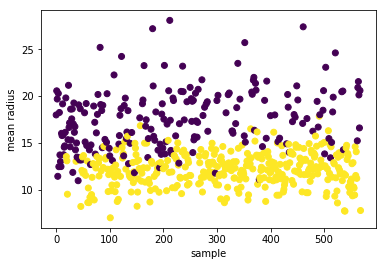

In [19]:
x = range(len(bc['mean radius']))
y = bc['mean radius']
plt.scatter(x,y,c=bc['class'])
plt.xlabel('sample')
plt.ylabel('mean radius')
plt.show()

# Training Data Versus Test Data
As before, we need to split the data back apart into features (X) and labels (y). Then, we can use the 'train_test_split' function from scikit-learn to randomly split our data into training and testing sets.


In [0]:
X = bc.iloc[:,:-1]
y = bc['class']

In [22]:
from sklearn.model_selection import train_test_split
#Split the data into 80% TRANING and 20% TESTING.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=327)

print('Training data size: (%i, %i)'%X_train.shape)
print('Tesing data size  : (%i, %i)'%X_test.shape)

Training data size: (455, 30)
Tesing data size  : (114, 30)


# Scalling the features

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
print('Training set mean by feature:')
print(X_train.mean(axis=0))
print('Training set standard deviation by feature:')
print(X_train.std(axis=0))

Training set mean by feature:
[-2.75628116e-15  4.59705534e-16 -5.40227204e-16  6.52957542e-16
  6.25189766e-15 -3.13644105e-15 -2.56205313e-16 -1.11607915e-15
 -3.54783358e-15  3.99192279e-15  8.92387507e-16 -4.62389589e-16
 -1.18725237e-15 -9.41005515e-16  1.29859493e-15  1.24088773e-15
  7.30795156e-16 -1.70315532e-16 -2.79580998e-15 -3.99436284e-16
 -1.29859493e-15  4.74785046e-15 -8.00824608e-16 -5.39495188e-16
  4.93427033e-15  1.86383265e-15 -9.58451877e-16 -1.65923441e-17
 -2.49739179e-15 -1.38546073e-15]
Training set standard deviation by feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# Training Our Model 
Time to build logistic regression model using  the training data. It is similar to Linear Regression model.


In [28]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Interpreting The Coefficients


In [31]:
intercept = regression_model.intercept_
coef = pd.DataFrame(regression_model.coef_.transpose(),index=breast_cancer_data.feature_names, columns=['Coefficients'])
print('Intercept=%f\n'%intercept)
print(coef)

Intercept=0.493176

                         Coefficients
mean radius                 -0.620034
mean texture                -0.504767
mean perimeter              -0.564625
mean area                   -0.646708
mean smoothness             -0.131364
mean compactness             0.460890
mean concavity              -0.800368
mean concave points         -0.771655
mean symmetry                0.168892
mean fractal dimension       0.553119
radius error                -1.144201
texture error                0.337015
perimeter error             -0.569919
area error                  -0.946128
smoothness error            -0.405995
compactness error            0.610680
concavity error             -0.154262
concave points error         0.078581
symmetry error               0.249923
fractal dimension error      0.731013
worst radius                -1.150628
worst texture               -1.192783
worst perimeter             -0.880301
worst area                  -1.086891
worst smoothness            -0

**Note: Read the detail desciption in the original article**

# Testing the Model on New Data

In [32]:
from sklearn.metrics import accuracy_score

y_pred = regression_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)*100

print('The test set accuracy is %4.2f%%' %test_acc)

The test set accuracy is 96.49%


## Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print(conf_matrix)

[[66  1]
 [ 3 44]]


___compare the above result with the following diagram___
![Confusion_Matrix](https://cdn-images-1.medium.com/max/800/1*mrBc8OW0NfXv43fpSnMa9g.png "Confusion Matix")

* True Negative  : 66 
* False Positive  : 01
* False Negative : 03
* True Positive    : 44

Accuracy = (66+44)/(66+1+3+44)
 

In [0]:
# True negatives
TN = conf_matrix[0][0]
# True positives
TP = conf_matrix[1][1]
# False negatives
FN = conf_matrix[1][0]
# False positives
FP = conf_matrix[0][1]

### Sensitivity or Recall

`TPR = TN/TN+FP`



In [37]:
TPR = float(TP)/(TP+FN)
print('TPR = %4.2f%%' % (TPR*100))

TPR = 93.62%


### Specificity or True Negative Rate


In [38]:
TNR = float(TN)/(TN+FP)
print('TNR = %4.2f%%' % (TNR*100))

TNR = 98.51%


### Precision or Positive Predictive Value(PPV)
How many did we correctly predict? In our case, the precision is equal to

In [39]:
PPV = float(TP)/(TP+FP)
print('PPV = %4.2f%%' % (PPV*100))

PPV = 97.78%


### Negative Predicitive value

In [40]:
NPV = float(TN)/(TN+FN)
print('NPV = %4.2f%%' % (NPV*100))

NPV = 95.65%


As you can see, calculating the accuracy of the model doesn't always tell the whole story. Because we had three false negatives, our TPR and NPV were lower than our accuracy. On the other hand, because we only had one false positive, our TNR and PPV were higher. Some tweaking of the model could help adjust these values, for example it may be desired to decrease the number of false negatives. This could be done by adjusting the parameters of the logistic regression model (we used the defaults), and the decision threshold itself (recall that the default probability threshold of 0.5 may not be appropriate in this case).

## Conclsion :
Just by calculating accuracy you can't tell the whole story. 
By calculating the whole scenario, means all the 